# Imports   

In [109]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image, ImageOps

# Processing Data

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
for data_set in (x_train, y_train, x_test, y_test):
    print(f'Shape: {data_set.shape}') 

Shape: (60000, 28, 28)
Shape: (60000,)
Shape: (10000, 28, 28)
Shape: (10000,)


# Training Model

In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(170, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [20]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [21]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 10)                135160    
_________________________________________________________________
softmax_2 (Softmax)          (None, 10)                0         
Total params: 135,160
Trainable params: 135,160
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 862us/step - loss: 1.5730 - accuracy: 0.9047
Epoch 2/10
1875/1875 [==============================] - 2s 929us/step - loss: 1.5190 - accuracy: 0.9472
Epoch 3/10
1875/1875 [==============================] - 2s 864us/step - loss: 1.5065 - accuracy: 0.9583
Epoch 4/10
1875/1875 [==============================] - 2s 869us/step - loss: 1.4998 - accuracy: 0.9639
Epoch 5/10
1875/1875 [==============================] - 2s 886us/step - loss: 1.4946 - accuracy: 0.9690
Epoch 6/10
1875/1875 [==============================] - 2s 873us/step - loss: 1.4902 - accuracy: 0.9731
Epoch 7/10
1875/1875 [==============================] - 2s 862us/step - loss: 1.4878 - accuracy: 0.9751
Epoch 8/10
1875/1875 [==============================] - 2s 867us/step - loss: 1.4858 - accuracy: 0.9768
Epoch 9/10
1875/1875 [==============================] - 2s 951us/step - loss: 1.4841 - accuracy: 0.9787
Epoch 10/10
1875/1875 [==============================] - 2s 887u

# Testing Model

In [24]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 1.4857 - accuracy: 0.9762


[1.4857282638549805, 0.9761999845504761]

In [128]:
def predict_img(x):
    img1 = Image.open(x).convert(mode='F')
    array1 = (np.array(img1.getdata()).reshape((28,28)) - 225) * -1

    reshaped = array1.reshape(28,28)
    final_img_data = np.expand_dims(reshaped, axis=0) / 255.0

    prediction = model.predict(final_img_data)

    return prediction, np.argmax(prediction), plt.imshow(array1)

(array([[8.3473705e-33, 9.9905044e-01, 2.5446814e-06, 9.4710180e-04,
         3.2421701e-37, 4.8649173e-16, 6.2022673e-26, 1.2310714e-24,
         5.5471239e-15, 2.5656561e-31]], dtype=float32),
 1,
 <matplotlib.image.AxesImage at 0x1b8328562e0>)

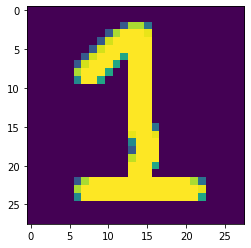

In [131]:
predict_img('../test_images/drawing.png')